In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [39]:
p_s = 100000 #Pa
p_t = 10000 #Pa
cp_air = 1000 #J kg-1 K-1
g = 10 #m s-2
Ra = 287 #J kg-1 K-1


lapse_dry = -g/cp_air #K/m 
lapse_moist = -5

In [40]:
def lapse_pressure(lapse_z): #dlnT/dlnp, dT/dz
    l_p = -Ra/g * lapse_z
    return l_p


def T_atm_z(T_s,z,lapse_z):
    Temp = T_s + z*lapse_z
    return Temp

def T_atm_p(T_s,p,lapse_p):
    Temp = T_s * (p/p_s)**(lapse_p)
    return Temp
    

def height(p,T):
    rho = p/(Ra*T)
    z = integrate.cumulative_trapezoid(-1/(g*rho),p,initial = 0)
    return z

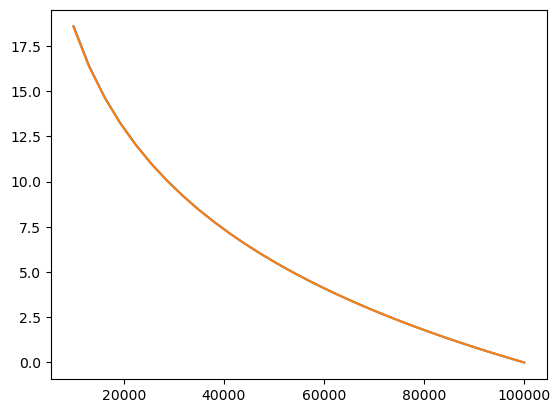

In [41]:
n_lev = 30
p = np.linspace(p_s,p_t,n_lev)
T = np.ones((n_lev))*280
z = height(p,T)

plt.plot(p,z/1000)
plt.plot(p_s*np.exp(-g*z/(Ra*280)),z/1000)
plt.show()

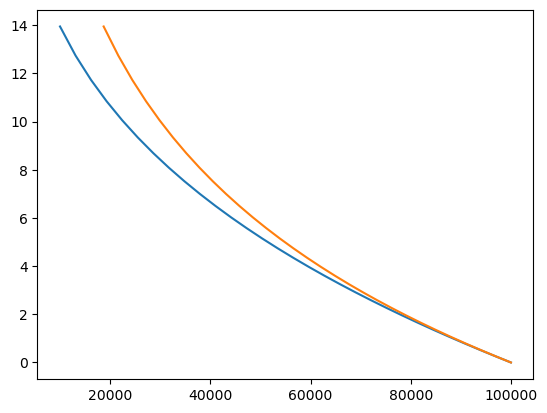

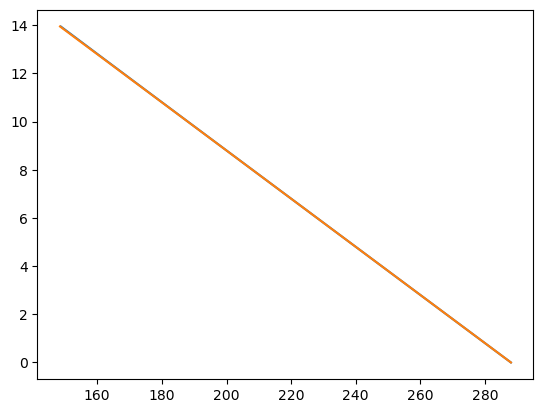

In [49]:
n_lev = 30
T_s = 288
p = np.linspace(p_s,p_t,n_lev)
lapse_p = lapse_pressure(lapse_dry)
T = T_atm_p(288,p,lapse_p)
z = height(p,T)

plt.plot(p,z/1000)
plt.plot(p_s*np.exp(-g*z/(Ra*290)),z/1000)
plt.show()
plt.plot(T,z/1000)
plt.plot(T_s+lapse_dry*z,z/1000)
plt.show()